In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from sklearn.preprocessing import LabelEncoder
import plotly.express as px

C:\Users\germi\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\germi\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv("master.csv", index_col=0)
df

,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
country,,,,,,,,,,,
Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...
Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27820 entries, Albania to Uzbekistan
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                27820 non-null  int64  
 1   sex                 27820 non-null  object 
 2   age                 27820 non-null  object 
 3   suicides_no         27820 non-null  int64  
 4   population          27820 non-null  int64  
 5   suicides/100k pop   27820 non-null  float64
 6   country-year        27820 non-null  object 
 7   HDI for year        8364 non-null   float64
 8    gdp_for_year ($)   27820 non-null  object 
 9   gdp_per_capita ($)  27820 non-null  int64  
 10  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(5)
memory usage: 2.5+ MB


In [4]:
if 'country' in df.index.names:
    df = df.reset_index()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [5]:
df[' gdp_for_year ($) '] = df[' gdp_for_year ($) '].str.replace(',', '')
df[' gdp_for_year ($) '] = pd.to_numeric(df[' gdp_for_year ($) '], errors='coerce')
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,2156624900,796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,63067077179,2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,63067077179,2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,63067077179,2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,63067077179,2309,Generation Z


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  int64  
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.5+ MB


In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [9]:
df = df.drop(['HDI for year'], axis=1)
df = df.drop(['country-year'], axis=1)
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,2156624900,796,Boomers
...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,63067077179,2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,63067077179,2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,63067077179,2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,63067077179,2309,Generation Z


In [10]:
df.describe()

,year,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,2.782000e+04,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,4.455810e+11,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,1.453610e+12,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,4.691962e+07,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,8.985353e+09,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,4.811469e+10,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,2.602024e+11,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,1.812071e+13,126352.000000


In [11]:
# Identifying Year Range by Country
year_range_by_country = df.groupby('country')['year'].agg([min, max]).reset_index()
year_range_by_country.columns = ['Country', 'Start Year', 'End Year']
year_range_by_country

C:\Users\germi\AppData\Local\Temp\ipykernel_18296\425246131.py:2: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  year_range_by_country = df.groupby('country')['year'].agg([min, max]).reset_index()
C:\Users\germi\AppData\Local\Temp\ipykernel_18296\425246131.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  year_range_by_country = df.groupby('country')['year'].agg([min, max]).reset_index()


,Country,Start Year,End Year
0,Albania,1987,2010
1,Antigua and Barbuda,1985,2015
2,Argentina,1985,2015
3,Armenia,1990,2016
4,Aruba,1995,2011
...,...,...,...
96,United Arab Emirates,2005,2010
97,United Kingdom,1985,2015
98,United States,1985,2015
99,Uruguay,1985,2015


In [12]:
n = year_range_by_country['Country'].unique()
len(n)

101

In [13]:
countries = df['country'].unique()
years = list(range(1985, 2017))
age_groups = ['15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']
sexes = ['male', 'female']
full_index = pd.MultiIndex.from_product([countries, years, sexes, age_groups], names=['country', 'year', 'sex', 'age'])
full_index

MultiIndex([(   'Albania', 1985,   'male', '15-24 years'),
            (   'Albania', 1985,   'male', '25-34 years'),
            (   'Albania', 1985,   'male', '35-54 years'),
            (   'Albania', 1985,   'male', '55-74 years'),
            (   'Albania', 1985,   'male',   '75+ years'),
            (   'Albania', 1985, 'female', '15-24 years'),
            (   'Albania', 1985, 'female', '25-34 years'),
            (   'Albania', 1985, 'female', '35-54 years'),
            (   'Albania', 1985, 'female', '55-74 years'),
            (   'Albania', 1985, 'female',   '75+ years'),
            ...
            ('Uzbekistan', 2016,   'male', '15-24 years'),
            ('Uzbekistan', 2016,   'male', '25-34 years'),
            ('Uzbekistan', 2016,   'male', '35-54 years'),
            ('Uzbekistan', 2016,   'male', '55-74 years'),
            ('Uzbekistan', 2016,   'male',   '75+ years'),
            ('Uzbekistan', 2016, 'female', '15-24 years'),
            ('Uzbekistan', 2016, 'female

In [14]:
df = df.set_index(['country', 'year', 'sex', 'age'])
df_full = pd.DataFrame(index=full_index).join(df).reset_index()
df_full

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1985,male,15-24 years,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,1985,male,25-34 years,NaN,NaN,NaN,NaN,NaN,NaN
2,Albania,1985,male,35-54 years,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,1985,male,55-74 years,NaN,NaN,NaN,NaN,NaN,NaN
4,Albania,1985,male,75+ years,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
32315,Uzbekistan,2016,female,15-24 years,NaN,NaN,NaN,NaN,NaN,NaN
32316,Uzbekistan,2016,female,25-34 years,NaN,NaN,NaN,NaN,NaN,NaN
32317,Uzbekistan,2016,female,35-54 years,NaN,NaN,NaN,NaN,NaN,NaN
32318,Uzbekistan,2016,female,55-74 years,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df_full['population'] = df_full.groupby(['country', 'sex', 'age'])['population'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))
df_full

C:\Users\germi\AppData\Local\Temp\ipykernel_18296\3107349597.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_full['population'] = df_full.groupby(['country', 'sex', 'age'])['population'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))


,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1985,male,15-24 years,NaN,312900.0,NaN,NaN,NaN,NaN
1,Albania,1985,male,25-34 years,NaN,274300.0,NaN,NaN,NaN,NaN
2,Albania,1985,male,35-54 years,NaN,308000.0,NaN,NaN,NaN,NaN
3,Albania,1985,male,55-74 years,NaN,137500.0,NaN,NaN,NaN,NaN
4,Albania,1985,male,75+ years,NaN,21800.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
32315,Uzbekistan,2016,female,15-24 years,NaN,2992817.0,NaN,NaN,NaN,NaN
32316,Uzbekistan,2016,female,25-34 years,NaN,2735238.0,NaN,NaN,NaN,NaN
32317,Uzbekistan,2016,female,35-54 years,NaN,3620833.0,NaN,NaN,NaN,NaN
32318,Uzbekistan,2016,female,55-74 years,NaN,1438935.0,NaN,NaN,NaN,NaN


In [16]:
df_full[[' gdp_for_year ($) ', 'gdp_per_capita ($)']] = df_full[[' gdp_for_year ($) ', 'gdp_per_capita ($)']].fillna(method='ffill').fillna(method='bfill')
df_full.head(50)

C:\Users\germi\AppData\Local\Temp\ipykernel_18296\3169859512.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_full[[' gdp_for_year ($) ', 'gdp_per_capita ($)']] = df_full[[' gdp_for_year ($) ', 'gdp_per_capita ($)']].fillna(method='ffill').fillna(method='bfill')


,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1985,male,15-24 years,NaN,312900.0,NaN,2.156625e+09,796.0,NaN
1,Albania,1985,male,25-34 years,NaN,274300.0,NaN,2.156625e+09,796.0,NaN
2,Albania,1985,male,35-54 years,NaN,308000.0,NaN,2.156625e+09,796.0,NaN
3,Albania,1985,male,55-74 years,NaN,137500.0,NaN,2.156625e+09,796.0,NaN
4,Albania,1985,male,75+ years,NaN,21800.0,NaN,2.156625e+09,796.0,NaN
5,Albania,1985,female,15-24 years,NaN,289700.0,NaN,2.156625e+09,796.0,NaN
6,Albania,1985,female,25-34 years,NaN,257200.0,NaN,2.156625e+09,796.0,NaN
7,Albania,1985,female,35-54 years,NaN,278800.0,NaN,2.156625e+09,796.0,NaN
8,Albania,1985,female,55-74 years,NaN,144600.0,NaN,2.156625e+09,796.0,NaN
9,Albania,1985,female,75+ years,NaN,35600.0,NaN,2.156625e+09,796.0,NaN


In [17]:
def assign_generation(row):
    year = row['year']
    age = row['age']
    
    # Handling age group extraction
    # Handle '75+ years' case
    if '+' in age:
        approx_age = 75
    # Extract the starting value of age range
    else:
        approx_age = int(age.split('-')[0])
    
    # Calculate birth year
    birth_year = year - approx_age
    
    # Determine the generation based on birth year
    if birth_year < 1928:
        return 'G.I. Generation'
    elif 1928 <= birth_year <= 1945:
        return 'Silent'
    elif 1946 <= birth_year <= 1964:
        return 'Boomers'
    elif 1965 <= birth_year <= 1980:
        return 'Generation X'
    elif 1981 <= birth_year <= 1996:
        return 'Millennials'
    else:
        return 'Generation Z'

In [18]:
df_full['generation'] = df_full.apply(assign_generation, axis=1)
df_full

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1985,male,15-24 years,NaN,312900.0,NaN,2.156625e+09,796.0,Generation X
1,Albania,1985,male,25-34 years,NaN,274300.0,NaN,2.156625e+09,796.0,Boomers
2,Albania,1985,male,35-54 years,NaN,308000.0,NaN,2.156625e+09,796.0,Boomers
3,Albania,1985,male,55-74 years,NaN,137500.0,NaN,2.156625e+09,796.0,Silent
4,Albania,1985,male,75+ years,NaN,21800.0,NaN,2.156625e+09,796.0,G.I. Generation
...,...,...,...,...,...,...,...,...,...,...
32315,Uzbekistan,2016,female,15-24 years,NaN,2992817.0,NaN,6.306708e+10,2309.0,Generation Z
32316,Uzbekistan,2016,female,25-34 years,NaN,2735238.0,NaN,6.306708e+10,2309.0,Millennials
32317,Uzbekistan,2016,female,35-54 years,NaN,3620833.0,NaN,6.306708e+10,2309.0,Millennials
32318,Uzbekistan,2016,female,55-74 years,NaN,1438935.0,NaN,6.306708e+10,2309.0,Boomers


In [19]:
df_full['suicides_no'] = df_full.groupby(['country', 'sex', 'age'])['suicides_no'].transform(lambda x: x.interpolate(method='linear', limit_direction='both'))
df_full

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1985,male,15-24 years,21.0,312900.0,NaN,2.156625e+09,796.0,Generation X
1,Albania,1985,male,25-34 years,9.0,274300.0,NaN,2.156625e+09,796.0,Boomers
2,Albania,1985,male,35-54 years,16.0,308000.0,NaN,2.156625e+09,796.0,Boomers
3,Albania,1985,male,55-74 years,1.0,137500.0,NaN,2.156625e+09,796.0,Silent
4,Albania,1985,male,75+ years,1.0,21800.0,NaN,2.156625e+09,796.0,G.I. Generation
...,...,...,...,...,...,...,...,...,...,...
32315,Uzbekistan,2016,female,15-24 years,347.0,2992817.0,NaN,6.306708e+10,2309.0,Generation Z
32316,Uzbekistan,2016,female,25-34 years,162.0,2735238.0,NaN,6.306708e+10,2309.0,Millennials
32317,Uzbekistan,2016,female,35-54 years,107.0,3620833.0,NaN,6.306708e+10,2309.0,Millennials
32318,Uzbekistan,2016,female,55-74 years,21.0,1438935.0,NaN,6.306708e+10,2309.0,Boomers


In [20]:
df_full['suicides/100k pop'] = df_full.apply(lambda x: round(x['suicides_no'] / (x['population'] / 100000), 2) if pd.notnull(x['suicides_no']) and pd.notnull(x['population']) else x['suicides/100k pop'], axis=1)
df_full

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1985,male,15-24 years,21.0,312900.0,6.71,2.156625e+09,796.0,Generation X
1,Albania,1985,male,25-34 years,9.0,274300.0,3.28,2.156625e+09,796.0,Boomers
2,Albania,1985,male,35-54 years,16.0,308000.0,5.19,2.156625e+09,796.0,Boomers
3,Albania,1985,male,55-74 years,1.0,137500.0,0.73,2.156625e+09,796.0,Silent
4,Albania,1985,male,75+ years,1.0,21800.0,4.59,2.156625e+09,796.0,G.I. Generation
...,...,...,...,...,...,...,...,...,...,...
32315,Uzbekistan,2016,female,15-24 years,347.0,2992817.0,11.59,6.306708e+10,2309.0,Generation Z
32316,Uzbekistan,2016,female,25-34 years,162.0,2735238.0,5.92,6.306708e+10,2309.0,Millennials
32317,Uzbekistan,2016,female,35-54 years,107.0,3620833.0,2.96,6.306708e+10,2309.0,Millennials
32318,Uzbekistan,2016,female,55-74 years,21.0,1438935.0,1.46,6.306708e+10,2309.0,Boomers


In [21]:
df_encoded = df_full.copy()
label_encoder = LabelEncoder()
categorical_cols = ['country', 'sex', 'age', 'generation']

# Encoding each categorical column
for col in categorical_cols:
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col])
    
df_encoded

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,0,1985,1,0,21.0,312900.0,6.71,2.156625e+09,796.0,2
1,0,1985,1,1,9.0,274300.0,3.28,2.156625e+09,796.0,0
2,0,1985,1,2,16.0,308000.0,5.19,2.156625e+09,796.0,0
3,0,1985,1,3,1.0,137500.0,0.73,2.156625e+09,796.0,5
4,0,1985,1,4,1.0,21800.0,4.59,2.156625e+09,796.0,1
...,...,...,...,...,...,...,...,...,...,...
32315,100,2016,0,0,347.0,2992817.0,11.59,6.306708e+10,2309.0,3
32316,100,2016,0,1,162.0,2735238.0,5.92,6.306708e+10,2309.0,4
32317,100,2016,0,2,107.0,3620833.0,2.96,6.306708e+10,2309.0,4
32318,100,2016,0,3,21.0,1438935.0,1.46,6.306708e+10,2309.0,0


In [22]:
df_encoded.describe()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
count,32320.000000,32320.000000,32320.000000,32320.000000,32320.000000,3.232000e+04,32320.000000,3.232000e+04,32320.000000,32320.000000
mean,50.000000,2000.500000,0.500000,2.000000,236.008756,1.554650e+06,14.504640,3.809758e+11,17310.409035,2.381250
std,29.155211,9.233235,0.500008,1.414235,871.253716,3.596122e+06,20.828139,1.306179e+12,19869.289126,1.812733
min,0.000000,1985.000000,0.000000,0.000000,0.000000,2.780000e+02,0.000000,4.691962e+07,251.000000,0.000000
25%,25.000000,1992.750000,0.000000,1.000000,2.000000,5.062100e+04,1.660000,6.369083e+09,3788.000000,1.000000
50%,50.000000,2000.500000,0.500000,2.000000,26.000000,3.258830e+05,7.220000,3.939656e+10,9501.000000,2.000000
75%,75.000000,2008.250000,1.000000,3.000000,135.000000,1.170072e+06,18.752500,2.181370e+11,23830.000000,4.000000
max,100.000000,2016.000000,1.000000,4.000000,22338.000000,4.380521e+07,224.970000,1.812071e+13,126352.000000,5.000000


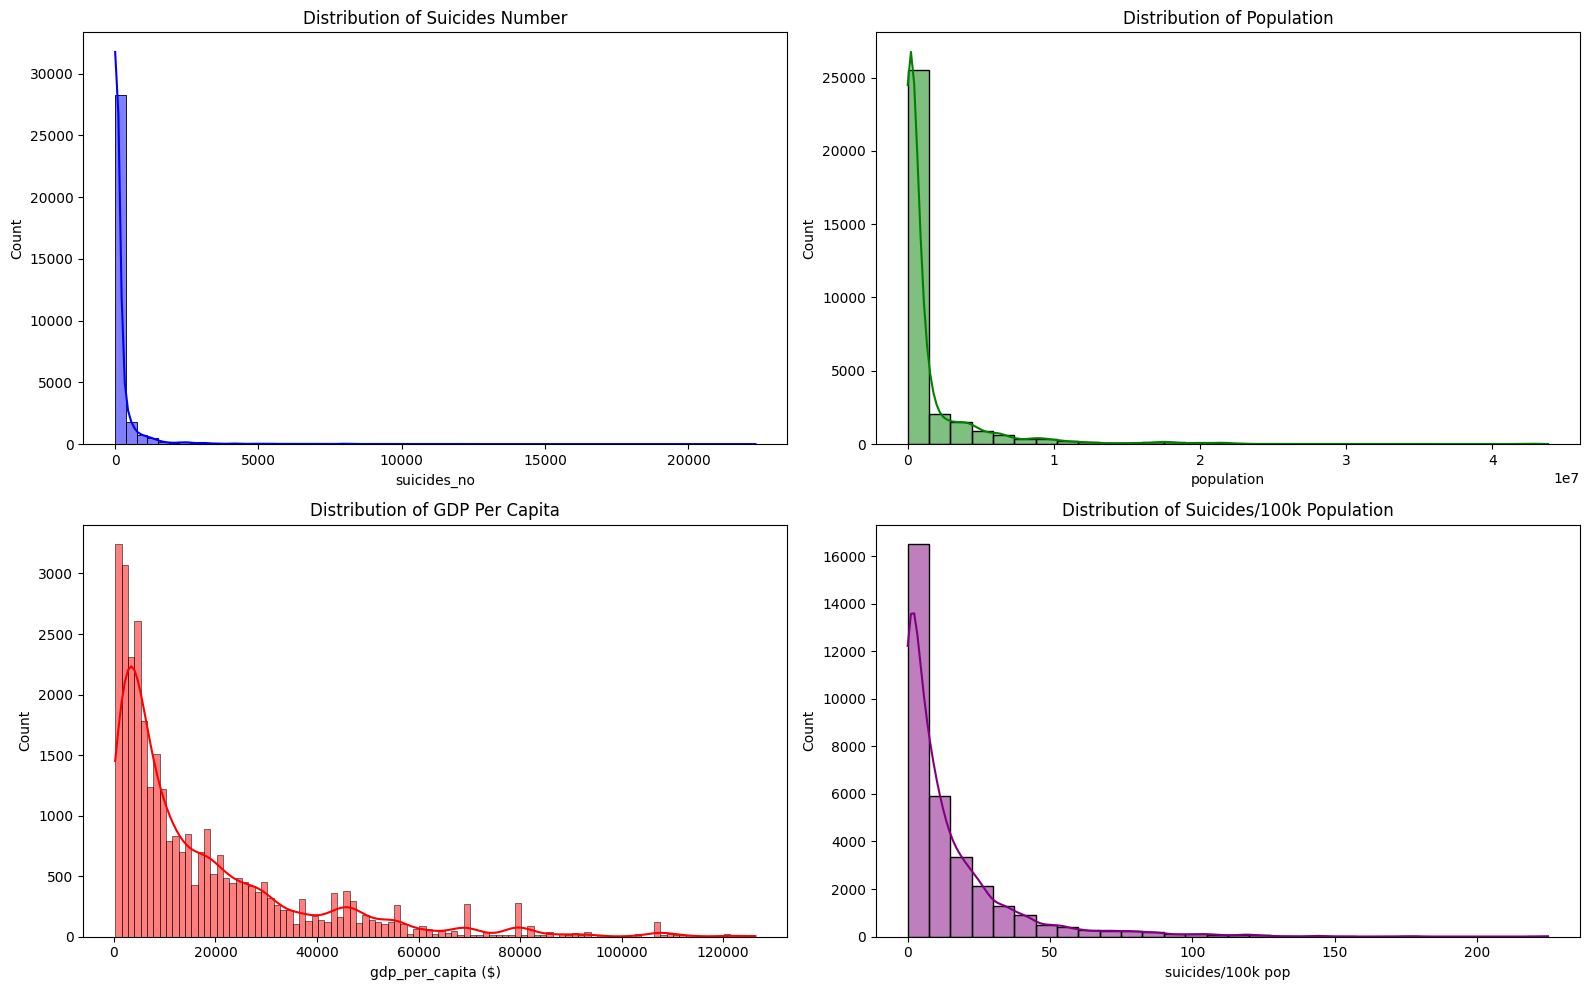

In [23]:
# Distribution of the Target Variable
plt.figure(figsize=(16, 10))
plt.subplot(2, 2, 1)
sns.histplot(df_full['suicides_no'], kde=True, color='blue', bins=60)
plt.title("Distribution of Suicides Number")

plt.subplot(2, 2, 2)
sns.histplot(df_full['population'], kde=True, color='green', bins=30)
plt.title("Distribution of Population")

plt.subplot(2, 2, 3)
sns.histplot(df_full['gdp_per_capita ($)'], kde=True, color='red')
plt.title("Distribution of GDP Per Capita")

plt.subplot(2, 2, 4)
sns.histplot(df_full['suicides/100k pop'], kde=True, color='purple', bins=30)
plt.title("Distribution of Suicides/100k Population")

plt.tight_layout()
plt.show()

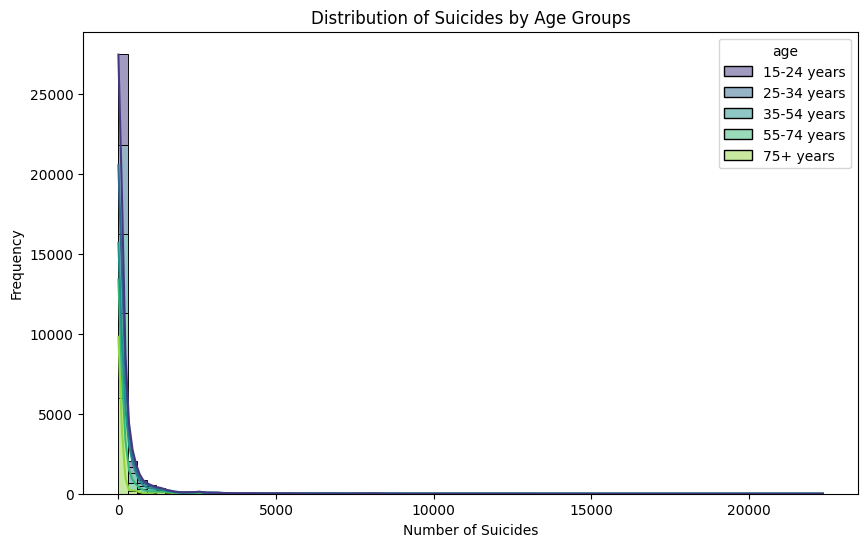

In [24]:
# Distribution of suicides for different age groups
plt.figure(figsize=(10, 6))
sns.histplot(data=df_full, x='suicides_no', hue='age', multiple='stack', palette='viridis', kde=True, bins=75)
plt.title('Distribution of Suicides by Age Groups')
plt.xlabel('Number of Suicides')
plt.ylabel('Frequency')
plt.show()

C:\Users\germi\AppData\Local\Temp\ipykernel_18296\2928079818.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=age_group_suicides, x='age', y='suicides_no', palette='pastel')


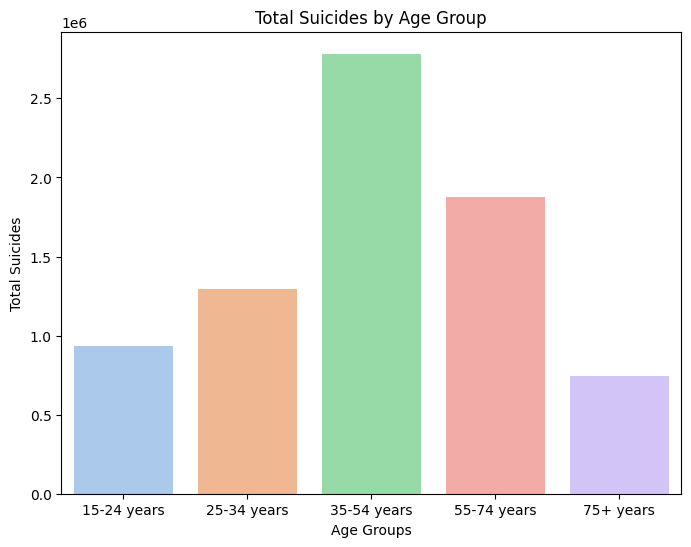

In [25]:
# Suicides by Age Groups
age_group_suicides = df_full.groupby('age')['suicides_no'].sum().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(data=age_group_suicides, x='age', y='suicides_no', palette='pastel')
plt.title('Total Suicides by Age Group')
plt.xlabel('Age Groups')
plt.ylabel('Total Suicides')
plt.show()

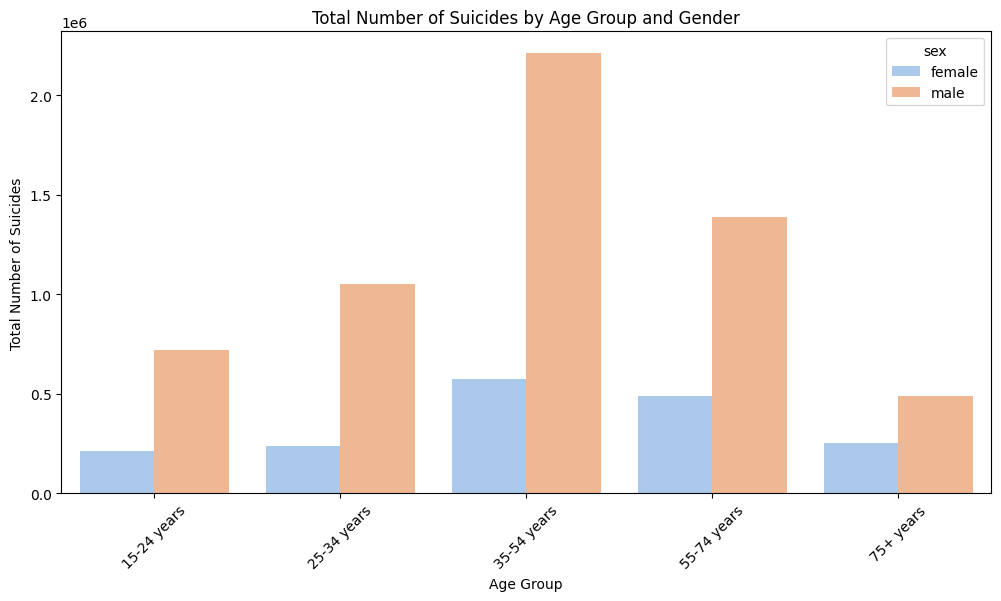

In [26]:
# Suicides by Age Groups and Gender
age_sex_suicides = df_full.groupby(['age', 'sex'])['suicides_no'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='age', y='suicides_no', hue='sex', data=age_sex_suicides, palette='pastel')
plt.title("Total Number of Suicides by Age Group and Gender")
plt.xlabel("Age Group")
plt.ylabel("Total Number of Suicides")
plt.xticks(rotation=45)
plt.show()

C:\Users\germi\AppData\Local\Temp\ipykernel_18296\669177100.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=age_group_suicides, x='age', y='suicides/100k pop', palette='pastel')


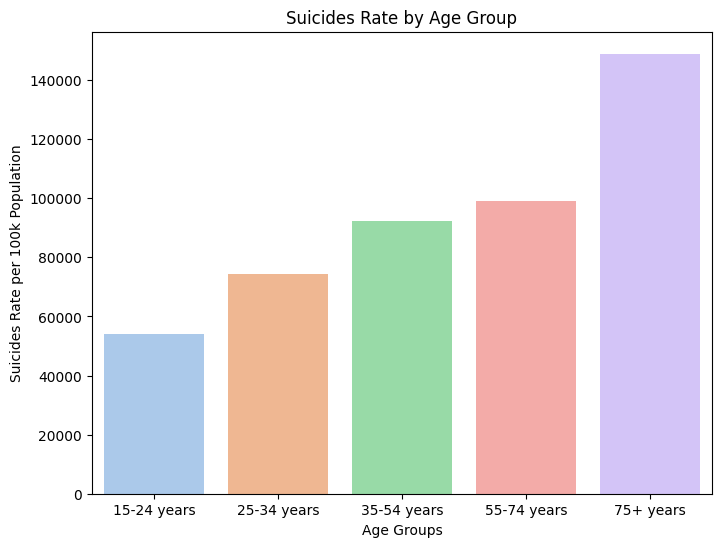

In [27]:
# Suicides Rate by Age Groups
age_group_suicides = df_full.groupby('age')['suicides/100k pop'].sum().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(data=age_group_suicides, x='age', y='suicides/100k pop', palette='pastel')
plt.title('Suicides Rate by Age Group')
plt.xlabel('Age Groups')
plt.ylabel('Suicides Rate per 100k Population')
plt.show()

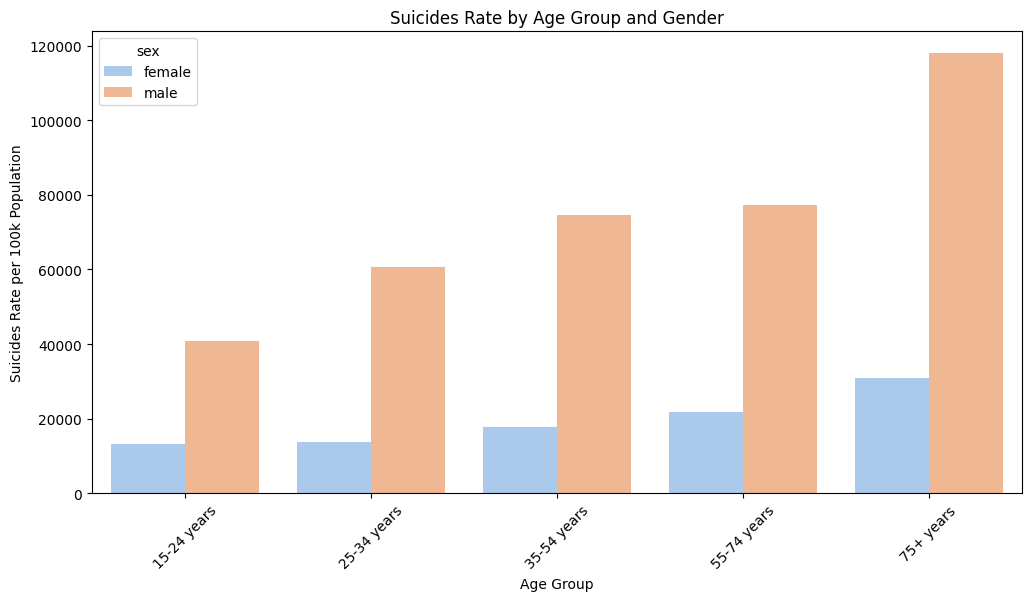

In [28]:
# Suicides Rate by Age Groups and Gender
age_sex_suicides = df_full.groupby(['age', 'sex'])['suicides/100k pop'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='age', y='suicides/100k pop', hue='sex', data=age_sex_suicides, palette='pastel')
plt.title("Suicides Rate by Age Group and Gender")
plt.xlabel("Age Group")
plt.ylabel("Suicides Rate per 100k Population")
plt.xticks(rotation=45)
plt.show()

C:\Users\germi\AppData\Local\Temp\ipykernel_18296\2959636711.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gender_suicides, x='sex', y='suicides_no', palette='pastel')


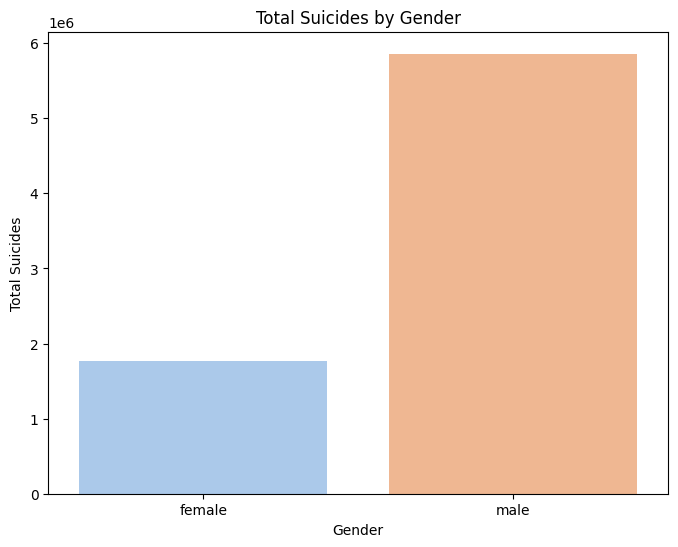

In [29]:
# Suicides by Gender
gender_suicides = df_full.groupby('sex')['suicides_no'].sum().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(data=gender_suicides, x='sex', y='suicides_no', palette='pastel')
plt.title('Total Suicides by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Suicides')
plt.show()

C:\Users\germi\AppData\Local\Temp\ipykernel_18296\274732786.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gender_suicides, x='generation', y='suicides_no', palette='pastel')


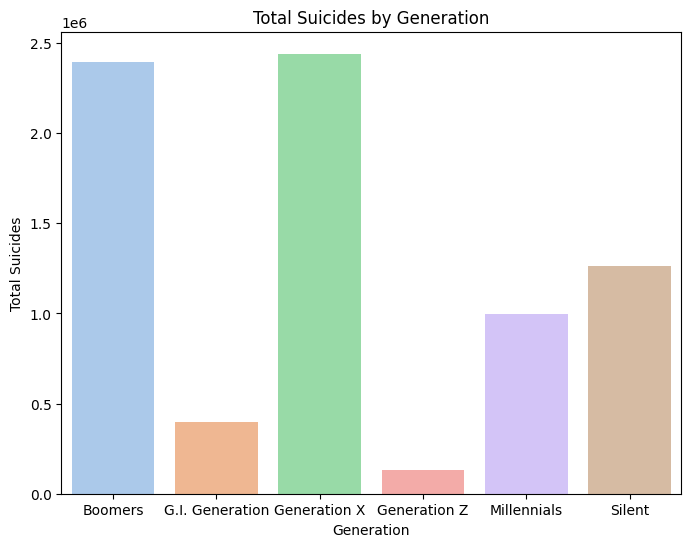

In [30]:
# Suicides by Generation
gender_suicides = df_full.groupby('generation')['suicides_no'].sum().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(data=gender_suicides, x='generation', y='suicides_no', palette='pastel')
plt.title('Total Suicides by Generation')
plt.xlabel('Generation')
plt.ylabel('Total Suicides')
plt.show()

C:\Users\germi\AppData\Local\Temp\ipykernel_18296\3575536218.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='generation', data=df_full, palette='viridis', order=df_full['generation'].value_counts().index)


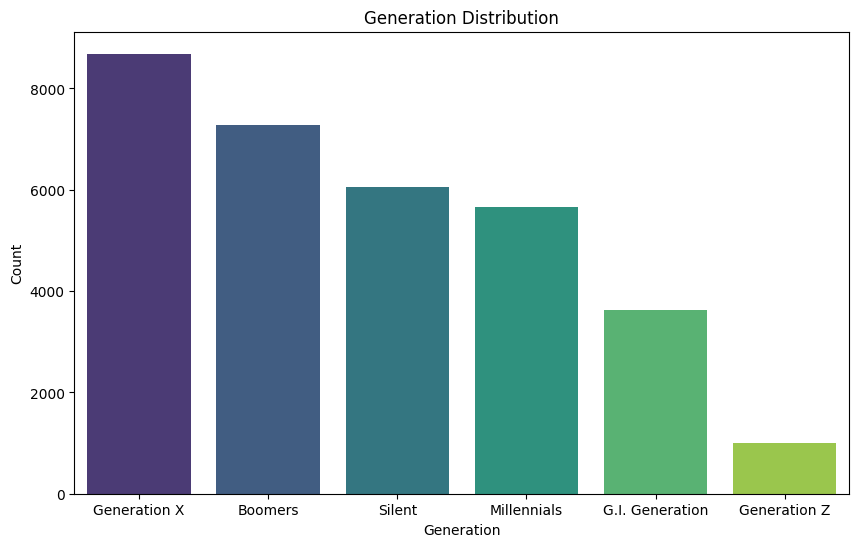

In [31]:
# Bar plot for generation distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='generation', data=df_full, palette='viridis', order=df_full['generation'].value_counts().index)
plt.title("Generation Distribution")
plt.xlabel('Generation')
plt.ylabel('Count')
plt.show()


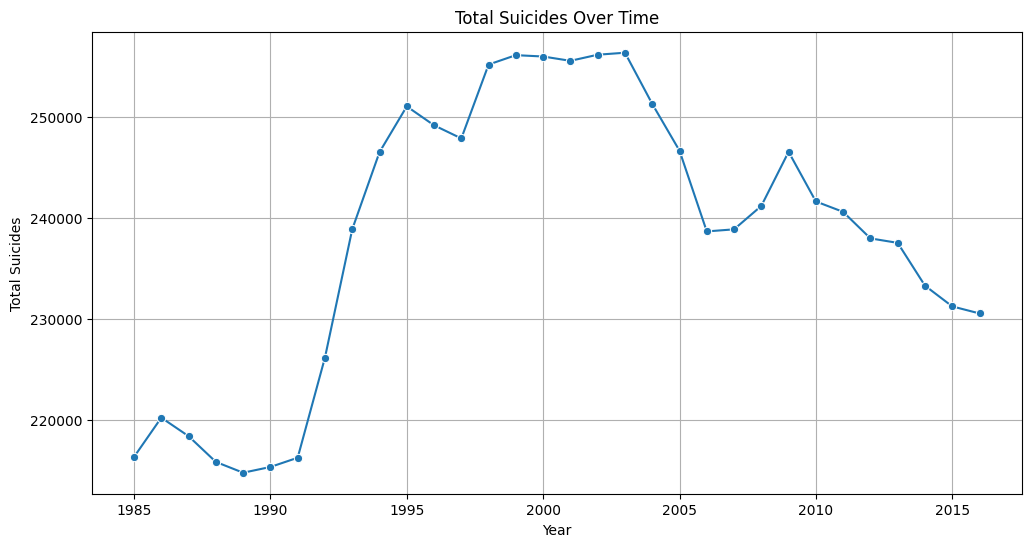

In [32]:
# Trend of total suicides over the years
yearly_suicides = df_full.groupby('year')['suicides_no'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='suicides_no', data=yearly_suicides, marker='o')
plt.title('Total Suicides Over Time')
plt.xlabel('Year')
plt.ylabel('Total Suicides')
plt.grid()
plt.show()

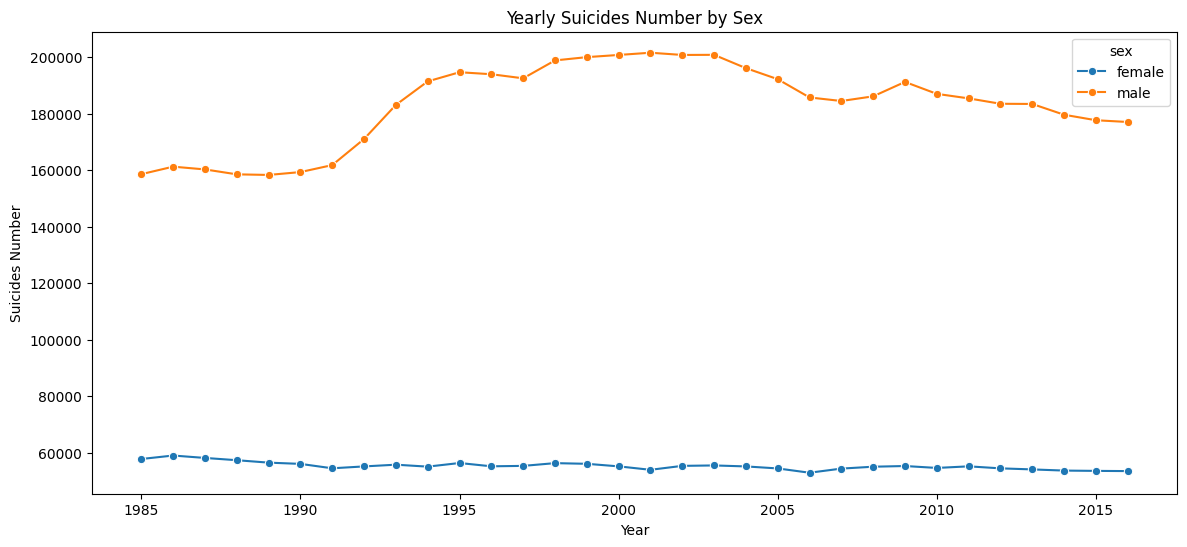

In [33]:
# Suicides number trends over the years by Gender
yearly_suicides_gender = df_full.groupby(['year', 'sex'])['suicides_no'].sum().reset_index()
plt.figure(figsize=(14, 6))
sns.lineplot(x='year', y='suicides_no', hue='sex', data=yearly_suicides_gender, marker='o', errorbar=None)
plt.title("Yearly Suicides Number by Sex")
plt.xlabel("Year")
plt.ylabel("Suicides Number")
plt.show()

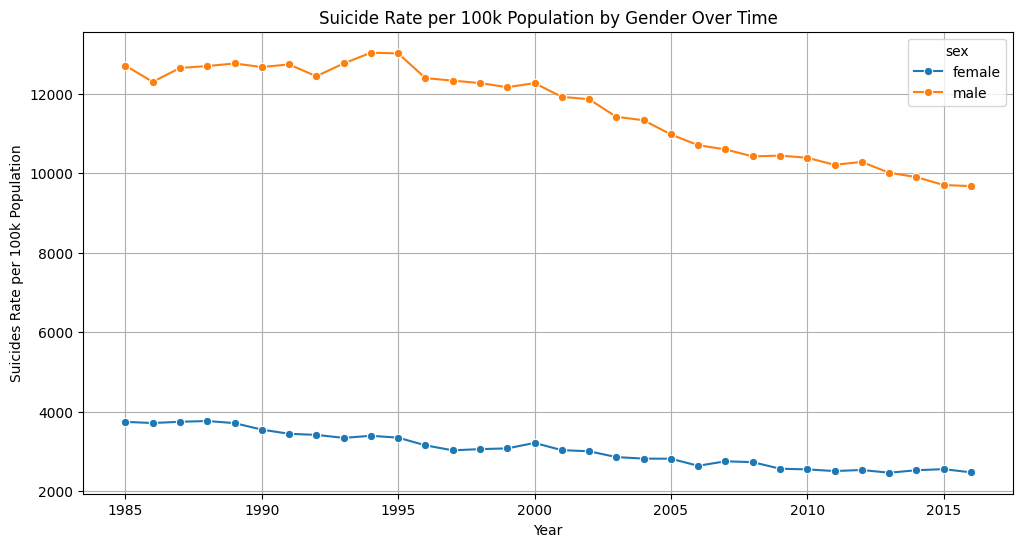

In [34]:
# Suicide Rate over Years by Gender
yearly_suicides_rate_gender = df_full.groupby(['year', 'sex'])['suicides/100k pop'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='suicides/100k pop', data=yearly_suicides_rate_gender, hue='sex', marker='o', errorbar=None)
plt.title('Suicide Rate per 100k Population by Gender Over Time')
plt.xlabel('Year')
plt.ylabel('Suicides Rate per 100k Population')
plt.grid()
plt.show()

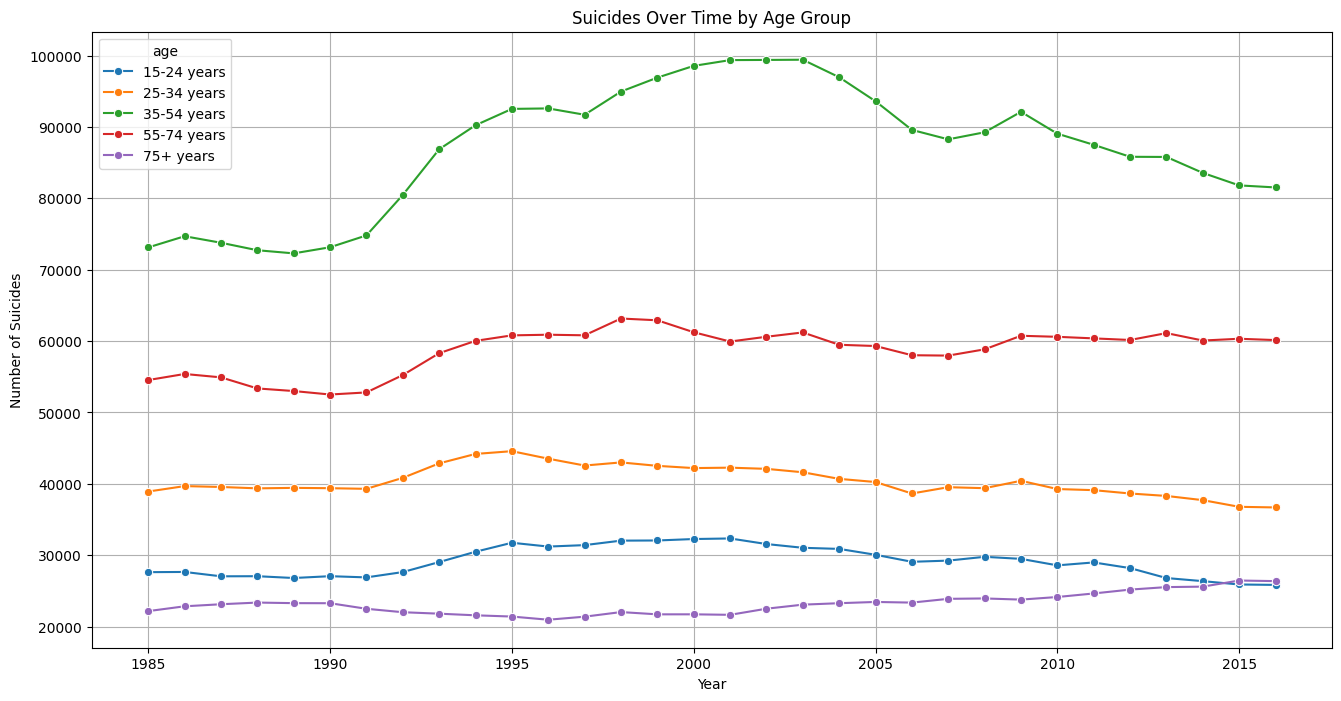

In [35]:
# Suicide Trends by Age Group
age_group_suicides = df_full.groupby(['year', 'age'])['suicides_no'].sum().reset_index()
plt.figure(figsize=(16, 8))
sns.lineplot(x='year', y='suicides_no', hue='age', data=age_group_suicides, marker='o')
plt.title('Suicides Over Time by Age Group')
plt.xlabel('Year')
plt.ylabel('Number of Suicides')
plt.grid()
plt.show()

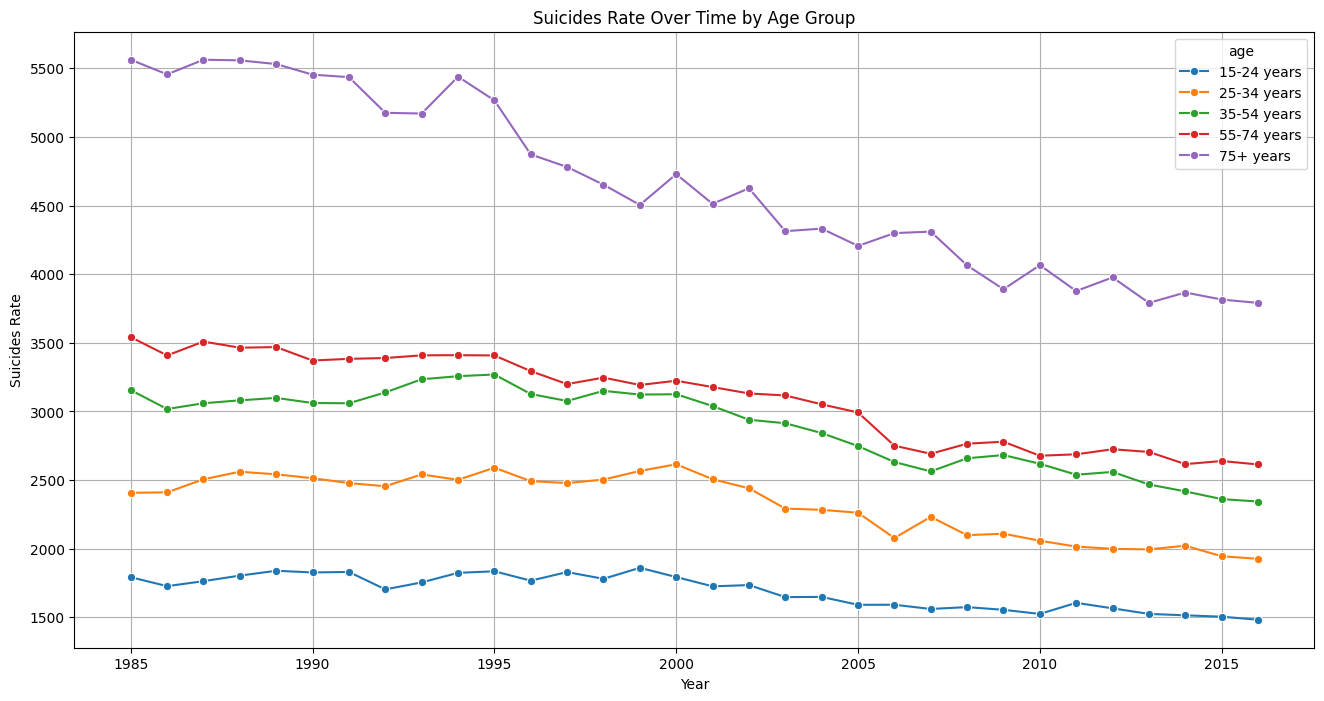

In [36]:
# Suicide Rate Trends by Age Group
age_group_suicides = df_full.groupby(['year', 'age'])['suicides/100k pop'].sum().reset_index()
plt.figure(figsize=(16, 8))
sns.lineplot(x='year', y='suicides/100k pop', hue='age', data=age_group_suicides, marker='o')
plt.title('Suicides Rate Over Time by Age Group')
plt.xlabel('Year')
plt.ylabel('Suicides Rate')
plt.grid()
plt.show()

C:\Users\germi\AppData\Local\Temp\ipykernel_18296\655881703.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_countries.index, x=top_countries.values, palette='viridis')


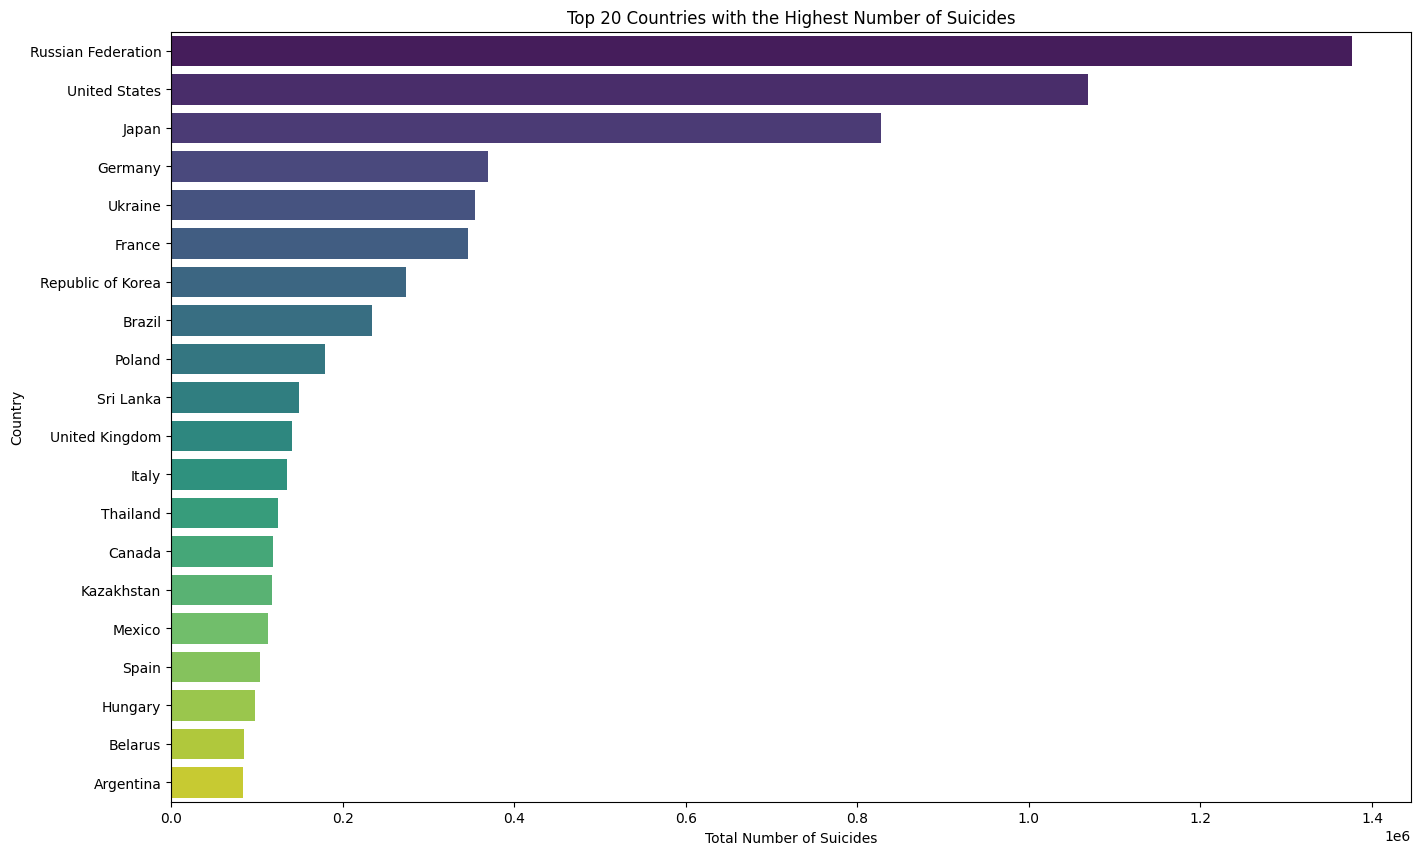

In [37]:
# Suicides by Country
plt.figure(figsize=(16, 10))
top_countries = df_full.groupby('country')['suicides_no'].sum().sort_values(ascending=False).head(20)
sns.barplot(y=top_countries.index, x=top_countries.values, palette='viridis')
plt.title("Top 20 Countries with the Highest Number of Suicides")
plt.xlabel("Total Number of Suicides")
plt.ylabel("Country")
plt.show()

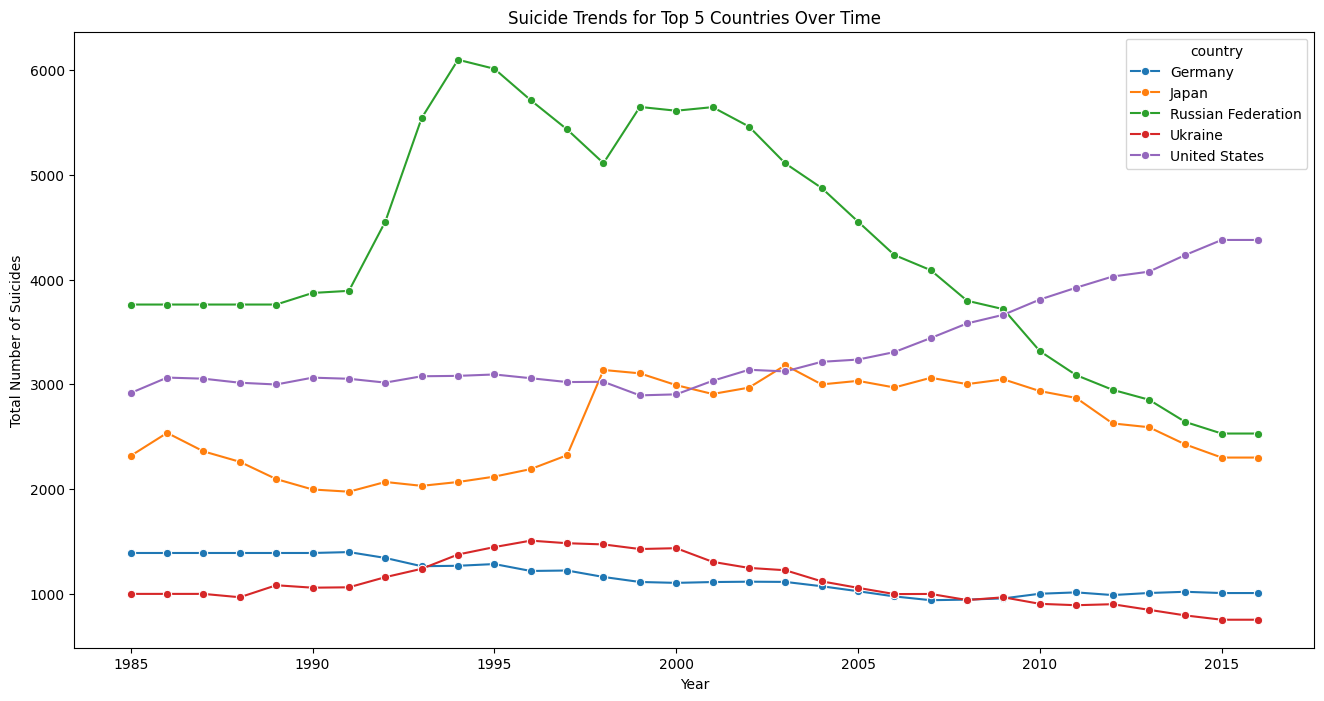

In [38]:
# Suicide Trends for Top 5 Countries Over Time
top_5_countries = df_full.groupby('country')['suicides_no'].sum().nlargest(5).index
df_top_5 = df_full[df_full['country'].isin(top_5_countries)]
plt.figure(figsize=(16, 8))
sns.lineplot(x='year', y='suicides_no', hue='country', data=df_top_5, marker='o', errorbar=None)
plt.title("Suicide Trends for Top 5 Countries Over Time")
plt.xlabel("Year")
plt.ylabel("Total Number of Suicides")
plt.show()

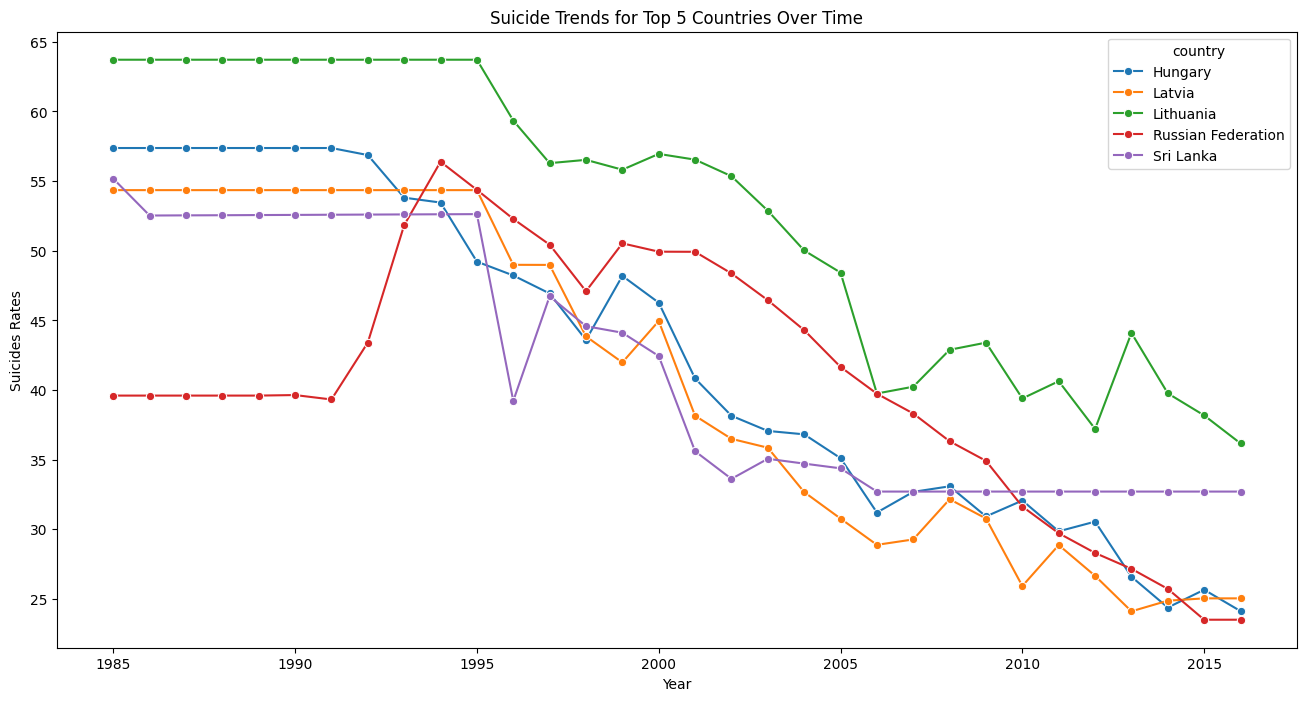

In [39]:
# Suicide Rates Trends for Top 5 Countries Over Time
top_5_countries = df_full.groupby('country')['suicides/100k pop'].sum().nlargest(5).index
df_top_5 = df_full[df_full['country'].isin(top_5_countries)]
plt.figure(figsize=(16, 8))
sns.lineplot(x='year', y='suicides/100k pop', hue='country', data=df_top_5, marker='o', errorbar=None)
plt.title("Suicide Trends for Top 5 Countries Over Time")
plt.xlabel("Year")
plt.ylabel("Suicides Rates")
plt.show()

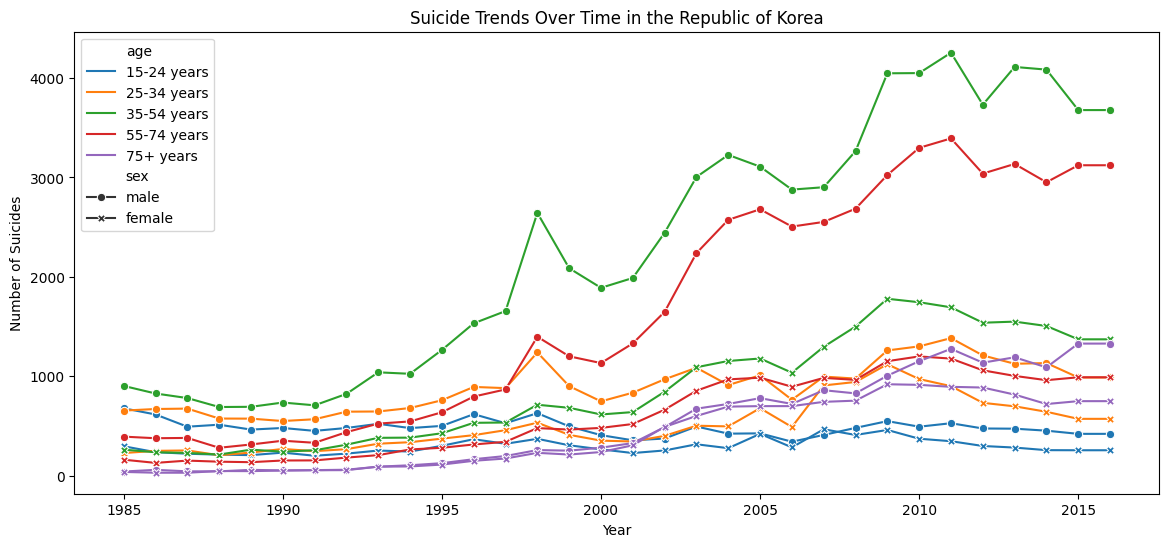

In [40]:
# Trend Analysis over the Years for specific counrty with sex and age groups
country_data = df_full[df_full['country'] == 'Republic of Korea']
plt.figure(figsize=(14, 6))
sns.lineplot(data=country_data, x='year', y='suicides_no', hue='age', style='sex', markers=True, dashes=False)
plt.title('Suicide Trends Over Time in the Republic of Korea')
plt.xlabel('Year')
plt.ylabel('Number of Suicides')
plt.show()

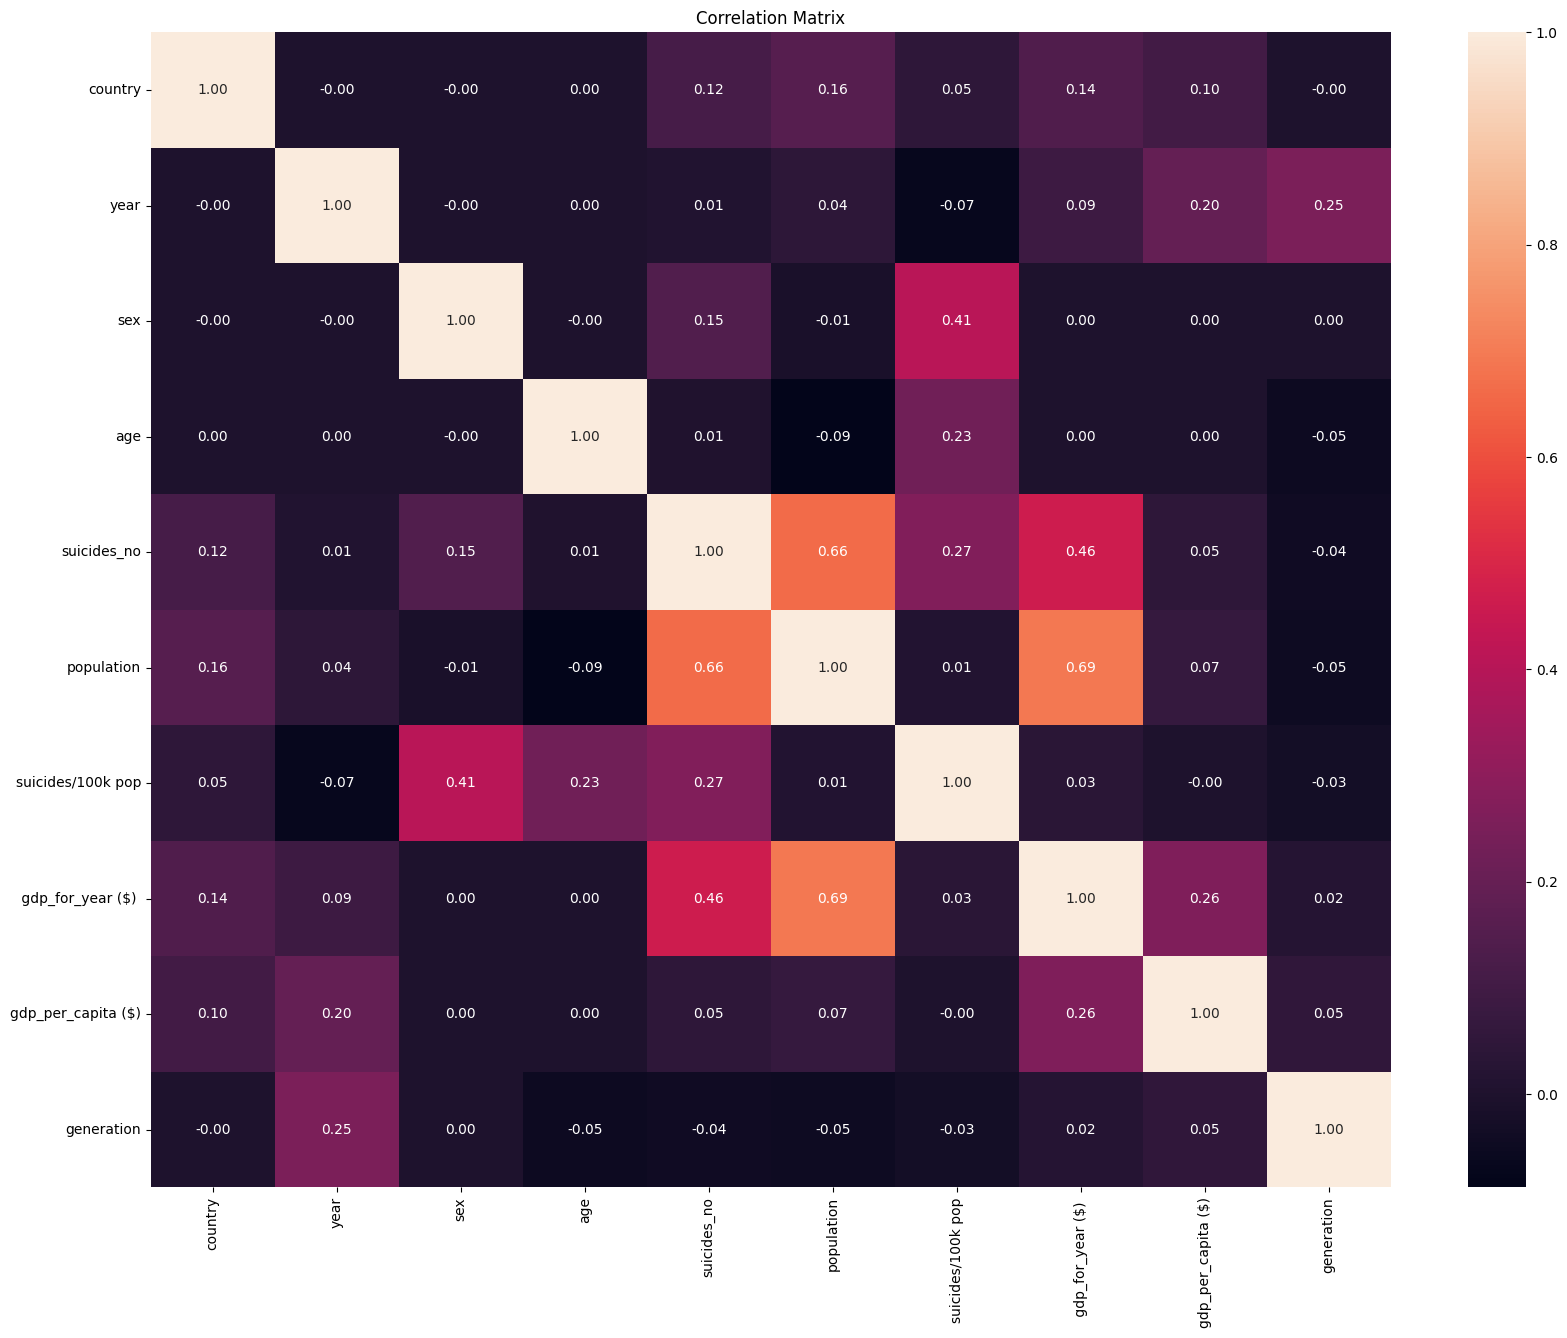

In [41]:
# Correlation Analysis
plt.figure(figsize=(20, 15))
sns.heatmap(df_encoded.corr(), annot=True, fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

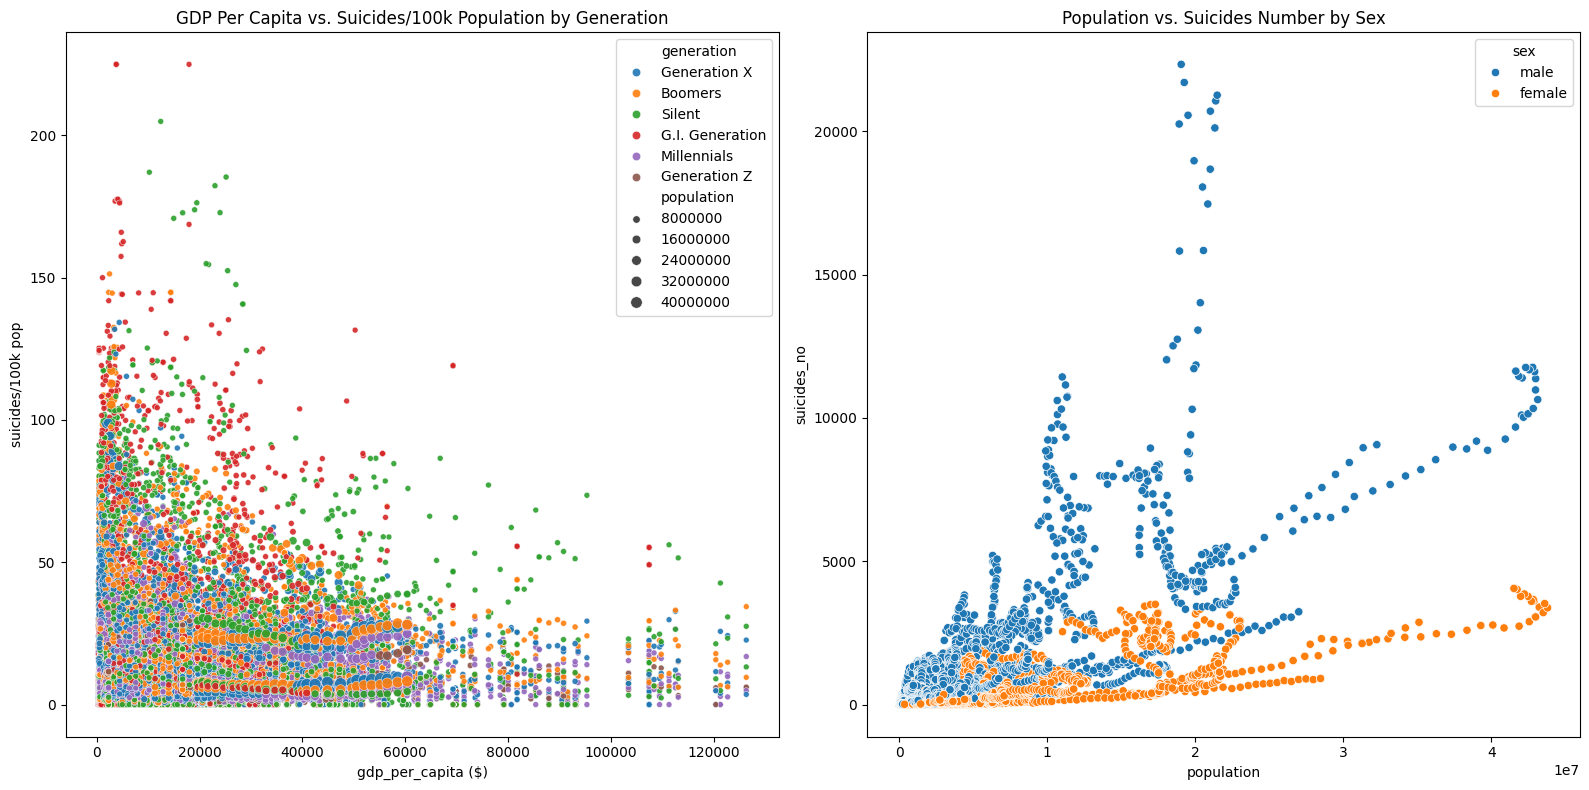

In [42]:
# Scatter plots to explore relationships between numeric features
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
sns.scatterplot(x='gdp_per_capita ($)', y='suicides/100k pop', hue='generation', data=df_full, size='population', alpha=0.9)
plt.title("GDP Per Capita vs. Suicides/100k Population by Generation")

plt.subplot(1, 2, 2)
sns.scatterplot(x='population', y='suicides_no', hue='sex', data=df_full)
plt.title("Population vs. Suicides Number by Sex")

plt.tight_layout()
plt.show()

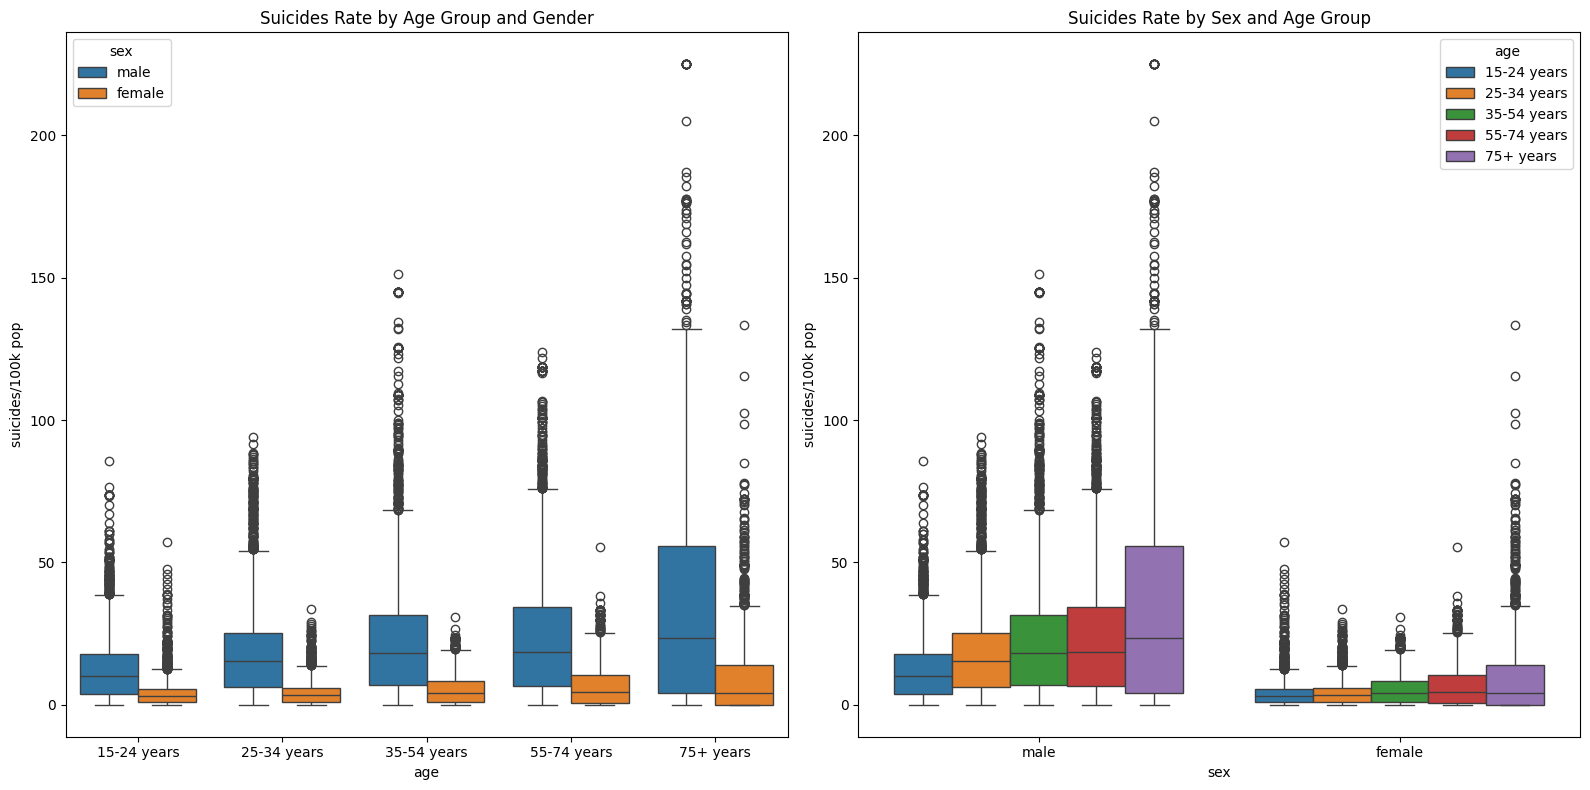

In [43]:
# Boxplot for numerical columns to visualize outliers
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
sns.boxplot(x='age', y='suicides/100k pop', hue='sex', data=df_full)
plt.title("Suicides Rate by Age Group and Gender")

plt.subplot(1, 2, 2)
sns.boxplot(x='sex', y='suicides/100k pop', hue='age', data=df_full)
plt.title("Suicides Rate by Sex and Age Group")

plt.tight_layout()
plt.show()

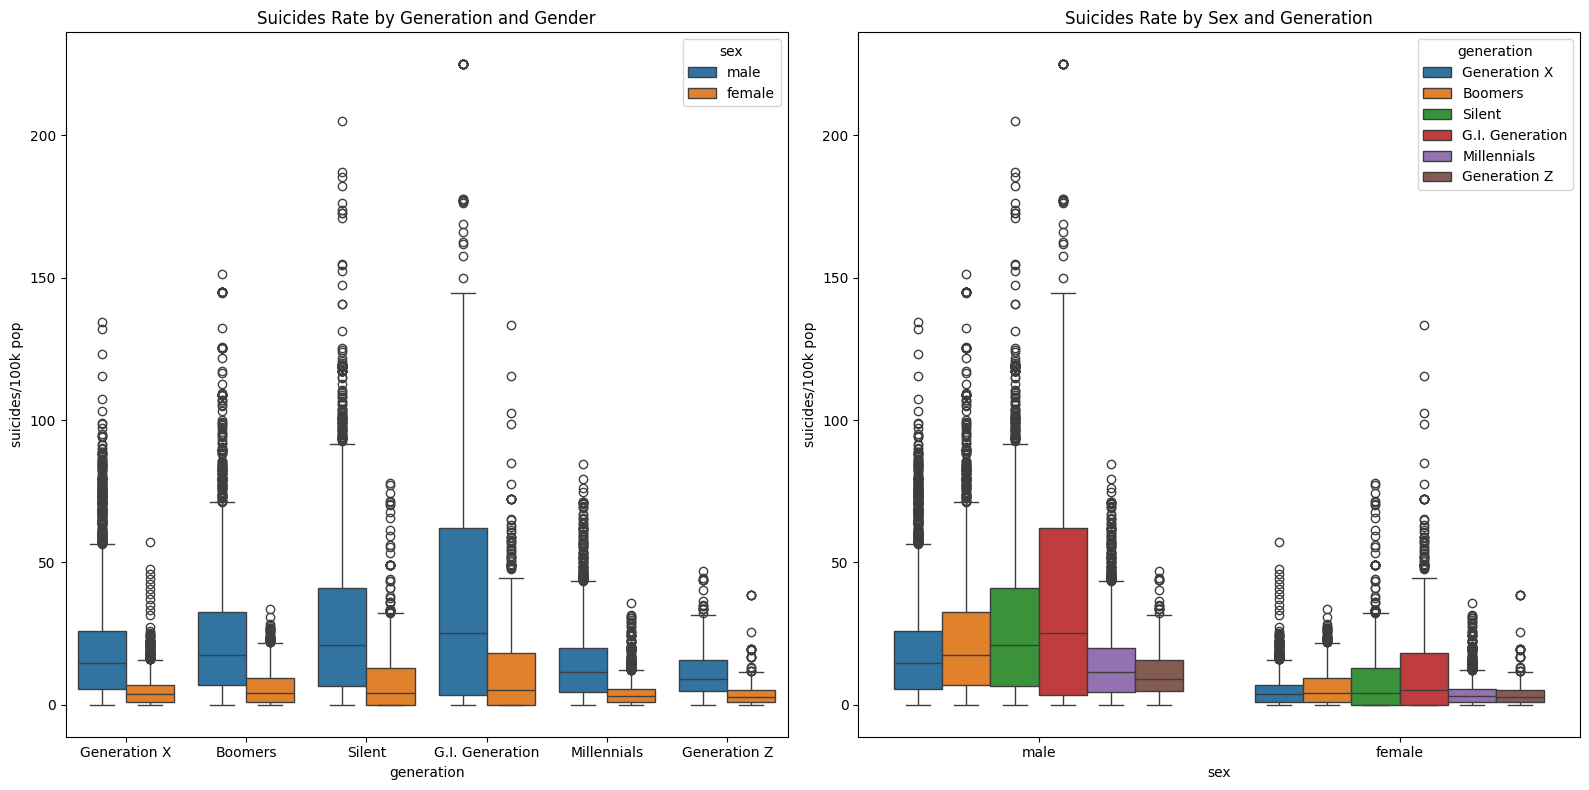

In [44]:
# Boxplot for numerical columns to visualize outliers
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
sns.boxplot(x='generation', y='suicides/100k pop', hue='sex', data=df_full)
plt.title("Suicides Rate by Generation and Gender")

plt.subplot(1, 2, 2)
sns.boxplot(x='sex', y='suicides/100k pop', hue='generation', data=df_full)
plt.title("Suicides Rate by Sex and Generation")

plt.tight_layout()
plt.show()

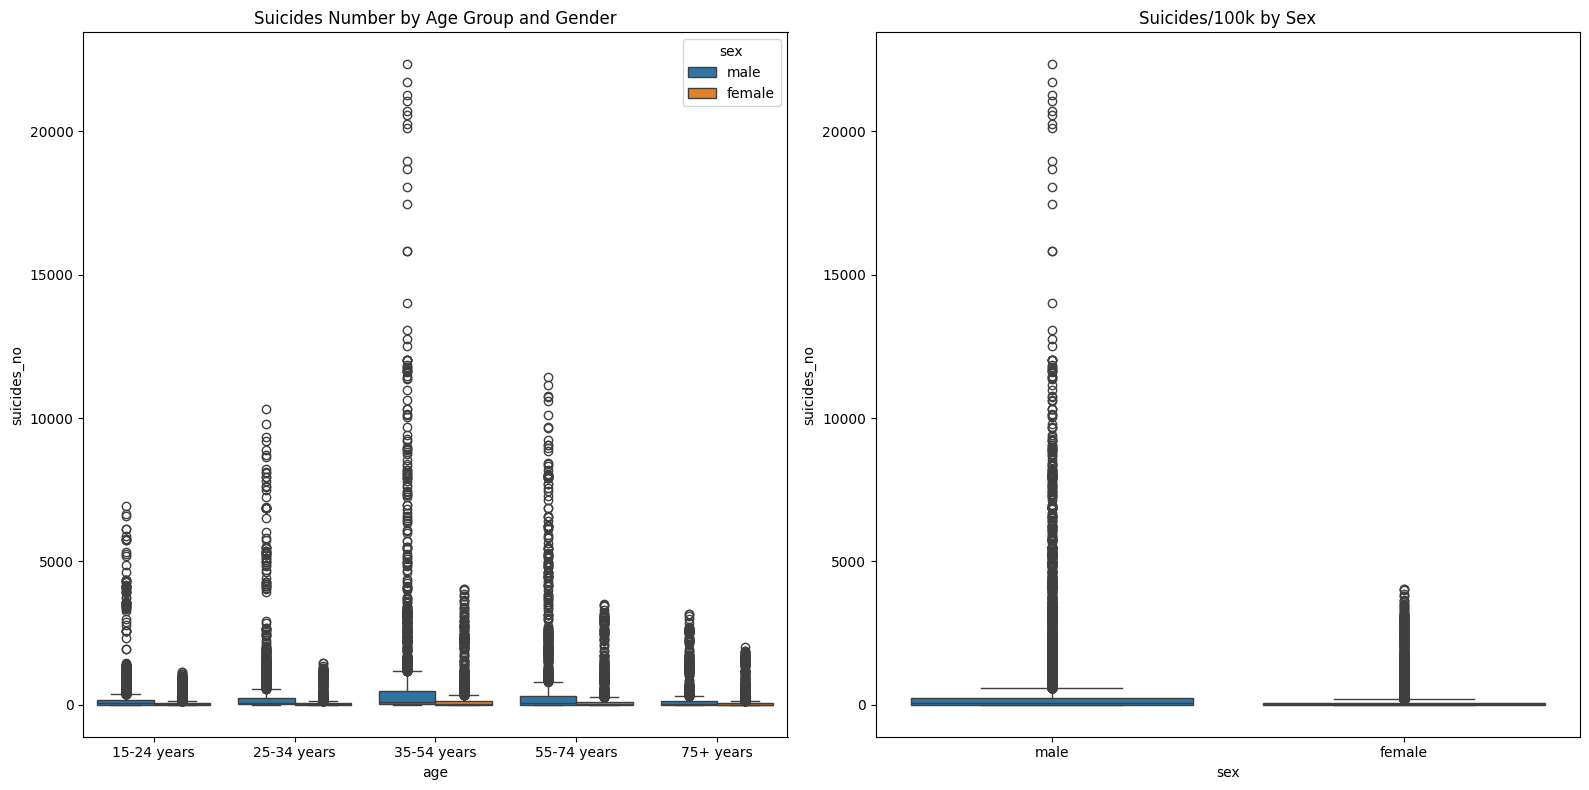

In [45]:
# Boxplot for numerical columns to visualize outliers
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
sns.boxplot(x='age', y='suicides_no', hue='sex', data=df_full)
plt.title("Suicides Number by Age Group and Gender")

plt.subplot(1, 2, 2)
sns.boxplot(x='sex', y='suicides_no', data=df_full)
plt.title("Suicides/100k by Sex")

plt.tight_layout()
plt.show()

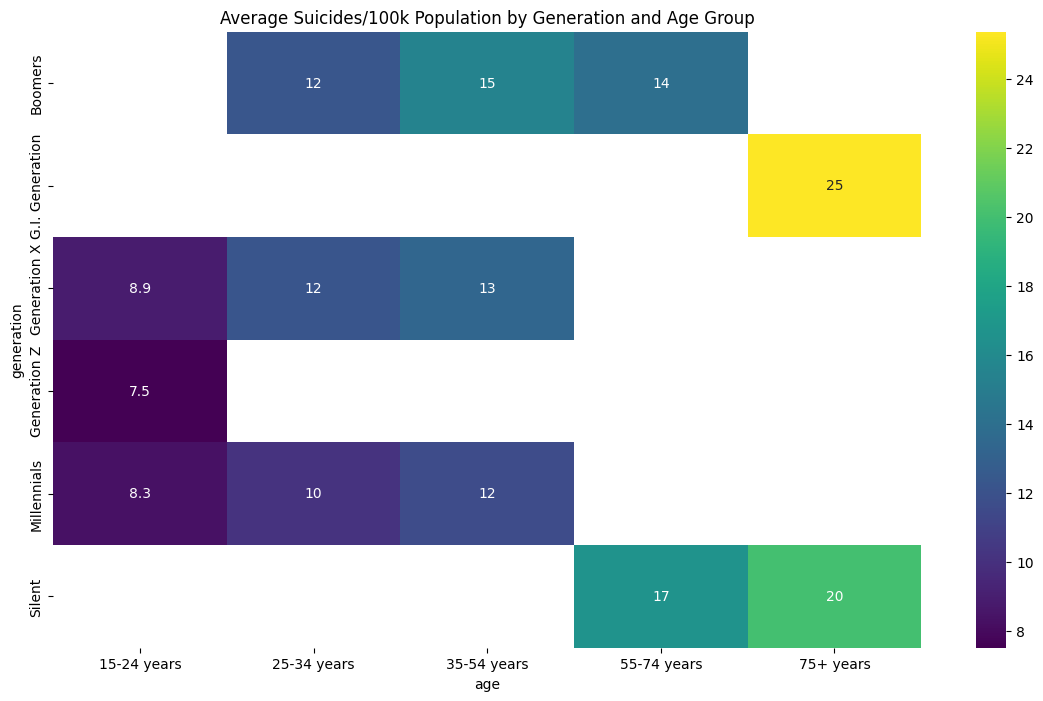

In [46]:
# Average Suicides/100k Population by Generation and Age Group
generation_age_group_avg = df_full.groupby(['generation', 'age'])['suicides/100k pop'].mean().unstack()
plt.figure(figsize=(14, 8))
sns.heatmap(generation_age_group_avg, annot=True, cmap='viridis')
plt.title("Average Suicides/100k Population by Generation and Age Group")
plt.show()

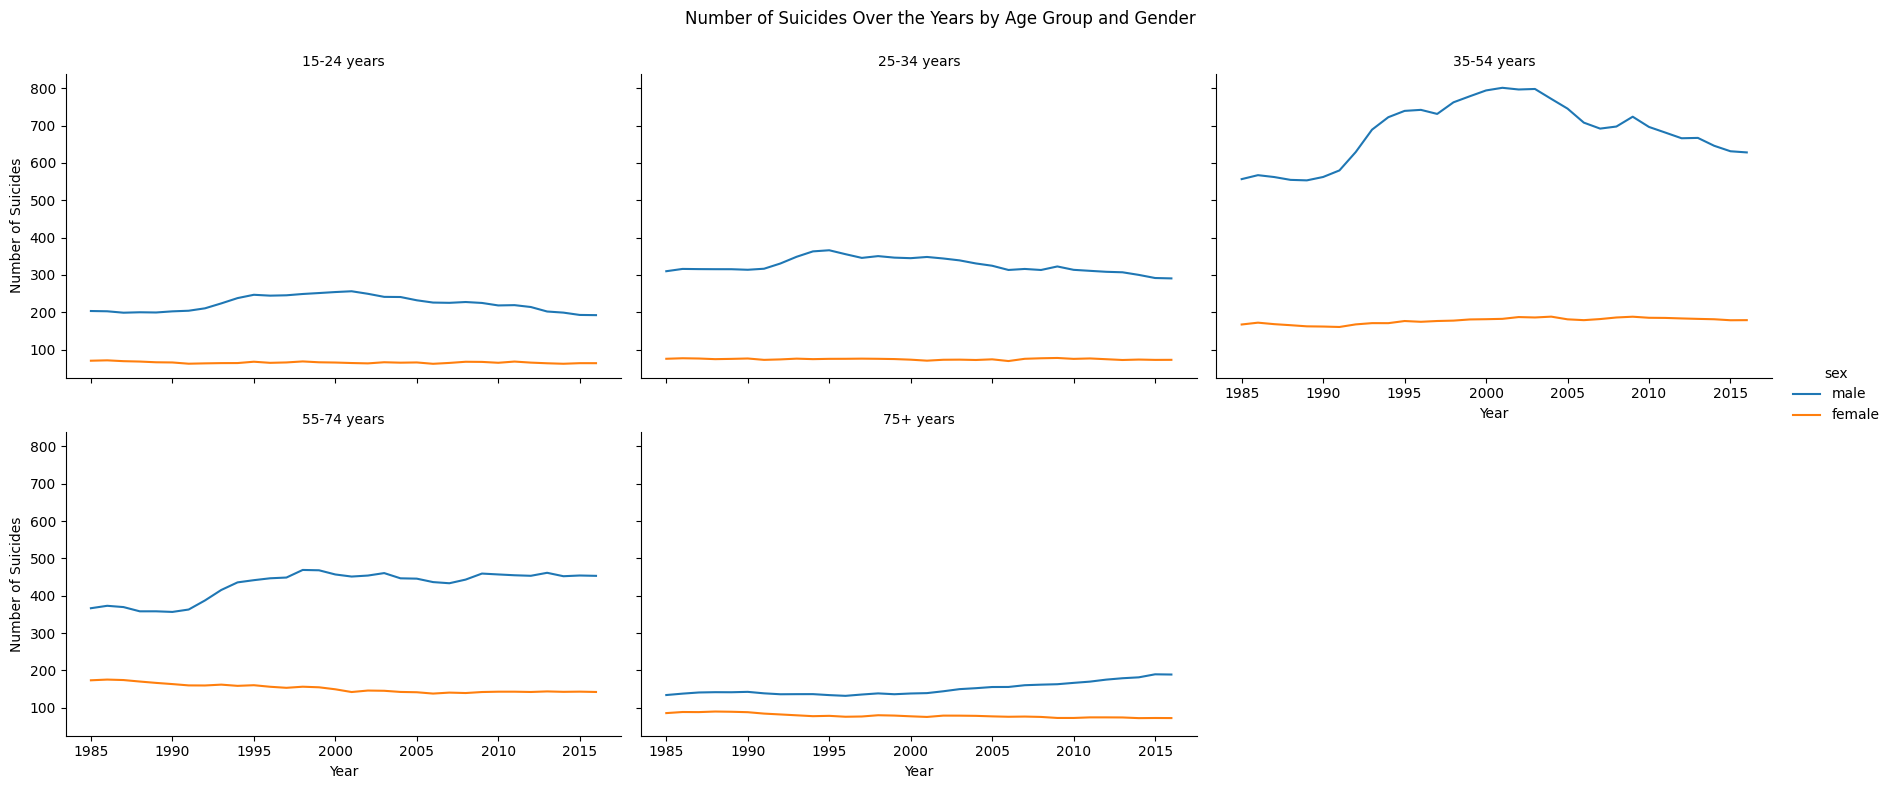

In [47]:
# FacetGrid plot to compare suicide rates by age group and sex over the years
g = sns.FacetGrid(df_full, col='age', hue='sex', col_wrap=3, height=4, aspect=1.5)
g.map(sns.lineplot, 'year', 'suicides_no', errorbar=None)
g.add_legend()
g.set_titles("{col_name}")
g.set_axis_labels("Year", "Number of Suicides")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Number of Suicides Over the Years by Age Group and Gender')
plt.show()

In [ ]:
# Pairplot for selected features
plt.figure(figsize=(10, 10))
sns.pairplot(df_full[['suicides_no', 'population', 'gdp_per_capita ($)', 'suicides/100k pop', 'age']], hue='age')
plt.title("Pairplot of Selected Features")
plt.show()

In [ ]:
df_country_suicides = df_full.groupby('country')['suicides_no'].sum().reset_index()
fig = px.choropleth(
    df_country_suicides,
    locations='country',
    locationmode='country names',
    color='suicides_no',
    hover_name='country',
    color_continuous_scale='Reds',
    title='Total Suicides by Country'
)
fig.show()